In [1]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [4]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
x = df['v2']
y = df['v1']


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

txt_clf1 = Pipeline([('tfidf', TfidfVectorizer()), ('clf',MultinomialNB())])
txt_clf1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [8]:
prediction_using_NB = txt_clf1.predict(x_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_NB = accuracy_score(y_test, prediction_using_NB)
accuracy_NB

0.9623318385650225

In [10]:
confusion_matrix(y_test,prediction_using_NB)

array([[965,   0],
       [ 42, 108]])

<Axes: >

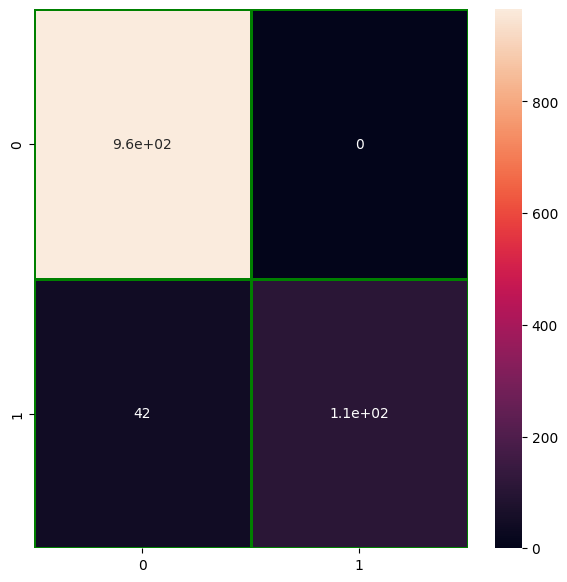

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,prediction_using_NB),annot=True,cbar=True,linewidths='1',linecolor='green')

In [12]:
print(classification_report(y_test,prediction_using_NB))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [13]:
from sklearn.linear_model import LogisticRegression

txt_reg1 = Pipeline([('tfidf', TfidfVectorizer()), ('reg',LogisticRegression())])
txt_reg1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('reg', LogisticRegression())])

In [14]:
prediction_using_LR = txt_reg1.predict(x_test)
accuracy_LR = accuracy_score(y_test,prediction_using_LR)
accuracy_LR

0.9659192825112107

In [15]:
confusion_matrix(y_test,prediction_using_LR)

array([[964,   1],
       [ 37, 113]])

<Axes: >

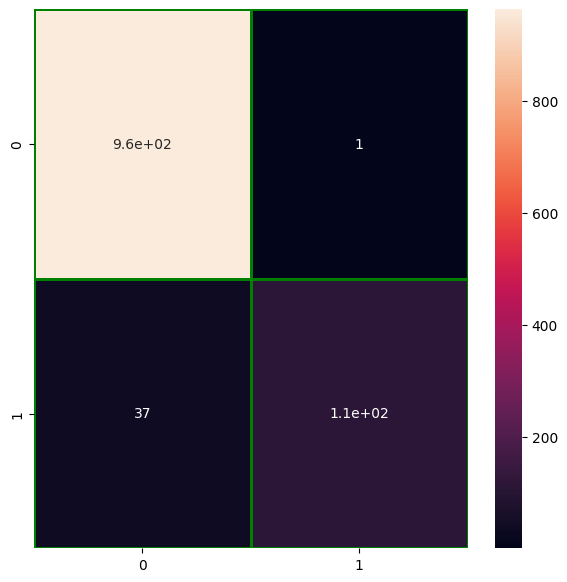

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,prediction_using_LR),annot=True,cbar=True,linewidths='1',linecolor='green')

In [17]:
print(classification_report(y_test,prediction_using_LR))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [18]:
from sklearn.svm import LinearSVC
txt_clf2 = Pipeline([('tfidf', TfidfVectorizer()), ('clf',LinearSVC())])
txt_clf2.fit(x_train,y_train)


/home/archit/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [19]:
prediction_using_SVM = txt_clf2.predict(x_test)
accuracy_SVM = accuracy_score(y_test,prediction_using_SVM)
accuracy_SVM

0.9829596412556054

In [20]:
confusion_matrix(y_test,prediction_using_SVM)

array([[963,   2],
       [ 17, 133]])

<Axes: >

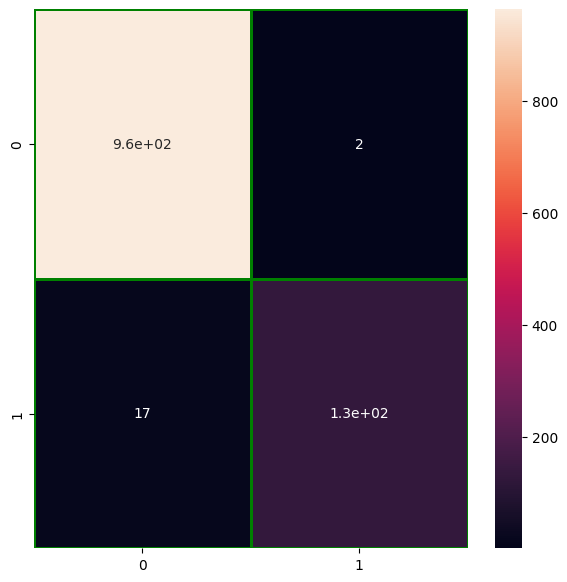

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test,prediction_using_SVM),annot=True,cbar=True,linewidths='1',linecolor='green')

In [22]:
print(classification_report(y_test,prediction_using_SVM))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

